In [1]:
!pip install yfinance pandas seaborn matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 24.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 66.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=843019 sha256=8c673a1c40addddbe6ae8db439d9c71fbf7f0ef0ce4628591d7eca62cbf531a6
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee


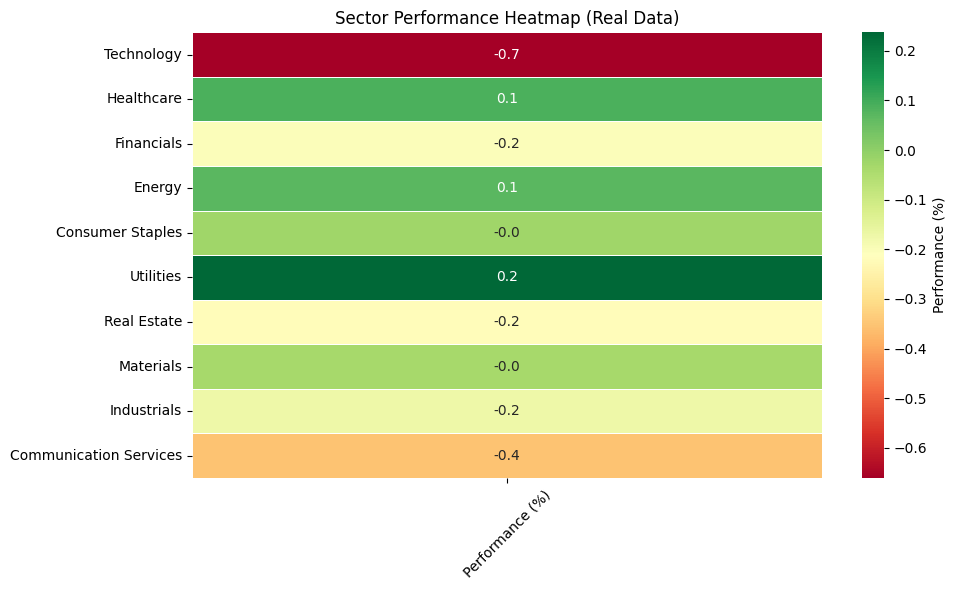

In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define sector ETFs as representatives for each sector
sector_etfs = {
    'Technology': 'XLK',
    'Healthcare': 'XLV',
    'Financials': 'XLF',
    'Energy': 'XLE',
    'Consumer Staples': 'XLP',
    'Utilities': 'XLU',
    'Real Estate': 'XLRE',
    'Materials': 'XLB',
    'Industrials': 'XLI',
    'Communication Services': 'XLC'
}

# Fetch recent performance data (1-day change)
performance = {}
for sector, ticker in sector_etfs.items():
    data = yf.Ticker(ticker).history(period="1d")
    if not data.empty:
        # Calculate percentage change
        close_price = data['Close'].iloc[-1]
        open_price = data['Open'].iloc[-1]
        change = ((close_price - open_price) / open_price) * 100
        performance[sector] = change
    else:
        performance[sector] = None  # Handle cases where data is unavailable

# Convert performance data into a DataFrame
df = pd.DataFrame(list(performance.items()), columns=['Sector', 'Performance (%)'])

# Reshape data for heatmap
heatmap_data = df.set_index('Sector')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',
    cmap='RdYlGn',
    linewidths=0.5,
    cbar_kws={'label': 'Performance (%)'}
)

# Customize the plot
plt.title('Sector Performance Heatmap (Real Data)')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()


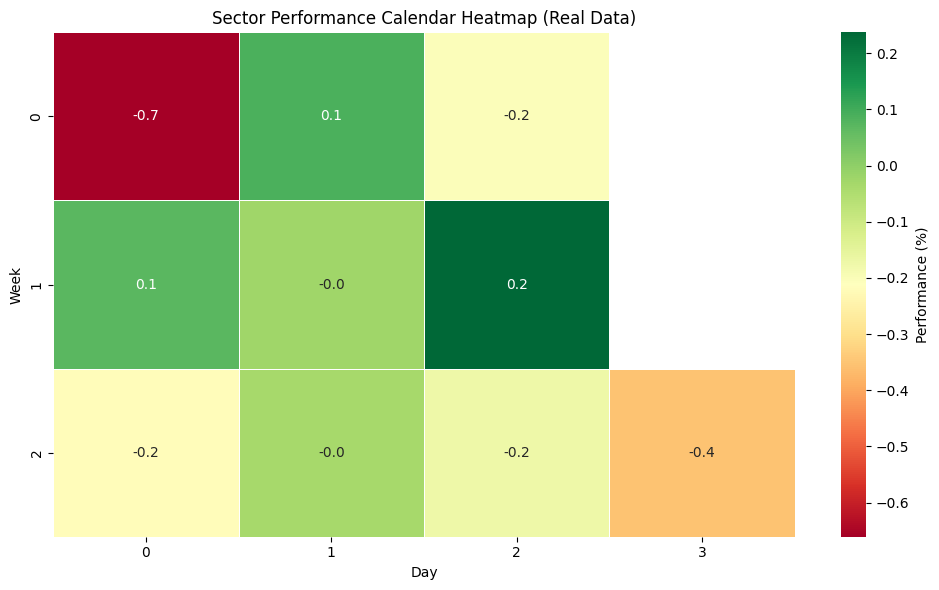

In [3]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define sector ETFs as representatives for each sector
sector_etfs = {
    'Technology': 'XLK',
    'Healthcare': 'XLV',
    'Financials': 'XLF',
    'Energy': 'XLE',
    'Consumer Staples': 'XLP',
    'Utilities': 'XLU',
    'Real Estate': 'XLRE',
    'Materials': 'XLB',
    'Industrials': 'XLI',
    'Communication Services': 'XLC'
}

# Fetch recent performance data (1-day change)
performance = {}
for sector, ticker in sector_etfs.items():
    data = yf.Ticker(ticker).history(period="1d")
    if not data.empty:
        # Calculate percentage change
        close_price = data['Close'].iloc[-1]
        open_price = data['Open'].iloc[-1]
        change = ((close_price - open_price) / open_price) * 100
        performance[sector] = change
    else:
        performance[sector] = None  # Handle cases where data is unavailable

# Convert performance data into a DataFrame
df = pd.DataFrame(list(performance.items()), columns=['Sector', 'Performance (%)'])

# Create a grid-like layout for sectors (calendar-style)
df['Row'] = [0, 0, 0, 1, 1, 1, 2, 2, 2, 2]  # Assign rows (like weeks in a calendar)
df['Col'] = [0, 1, 2, 0, 1, 2, 0, 1, 2, 3]  # Assign columns (like days in a calendar)

# Pivot the data for the heatmap
calendar_data = df.pivot(index='Row', columns='Col', values='Performance (%)')

# Plot the calendar-style heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    calendar_data,
    annot=True,
    fmt='.1f',
    cmap='RdYlGn',
    linewidths=0.5,
    cbar_kws={'label': 'Performance (%)'}
)

# Customize the plot
plt.title('Sector Performance Calendar Heatmap (Real Data)')
plt.ylabel('Week')
plt.xlabel('Day')
plt.tight_layout()

# Show the heatmap
plt.show()


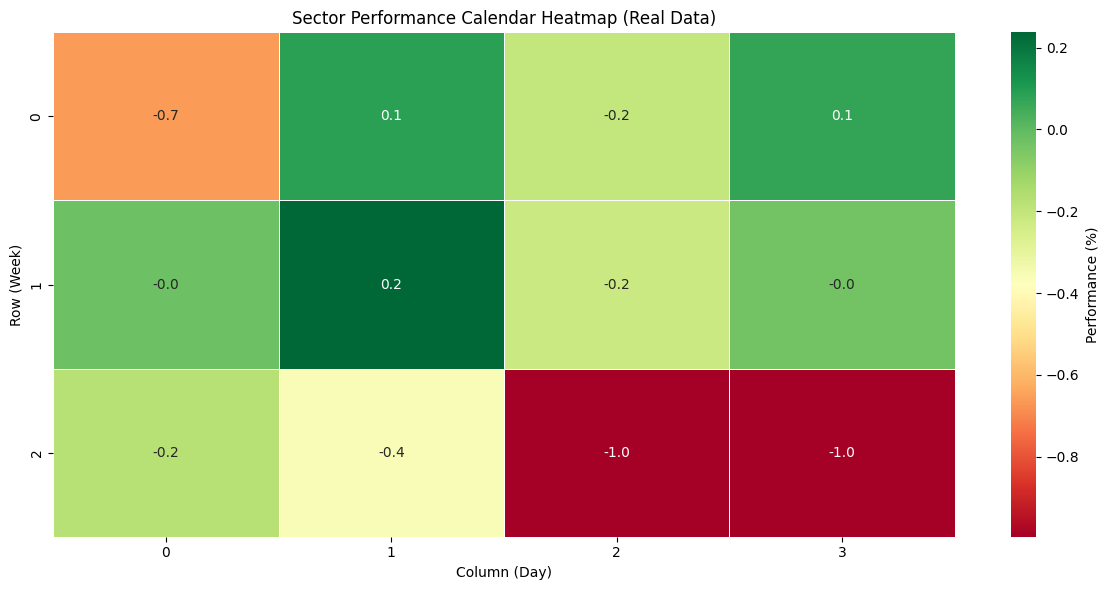

In [4]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define sector ETFs as representatives for 12 sectors
sector_etfs = {
    'Technology': 'XLK',
    'Healthcare': 'XLV',
    'Financials': 'XLF',
    'Energy': 'XLE',
    'Consumer Staples': 'XLP',
    'Utilities': 'XLU',
    'Real Estate': 'XLRE',
    'Materials': 'XLB',
    'Industrials': 'XLI',
    'Communication Services': 'XLC',
    'Consumer Discretionary': 'XLY',
    'Information Technology': 'VGT'  # Alternative technology ETF
}

# Fetch recent performance data (1-day change)
performance = {}
for sector, ticker in sector_etfs.items():
    data = yf.Ticker(ticker).history(period="1d")
    if not data.empty:
        # Calculate percentage change
        close_price = data['Close'].iloc[-1]
        open_price = data['Open'].iloc[-1]
        change = ((close_price - open_price) / open_price) * 100
        performance[sector] = change
    else:
        performance[sector] = None  # Handle cases where data is unavailable

# Convert performance data into a DataFrame
df = pd.DataFrame(list(performance.items()), columns=['Sector', 'Performance (%)'])

# Create a grid-like layout for 12 sectors (calendar-style)
df['Row'] = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]  # Assign rows (3 rows in a calendar grid)
df['Col'] = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]  # Assign columns (4 columns in a calendar grid)

# Pivot the data for the heatmap
calendar_data = df.pivot(index='Row', columns='Col', values='Performance (%)')

# Plot the calendar-style heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    calendar_data,
    annot=True,
    fmt='.1f',
    cmap='RdYlGn',
    linewidths=0.5,
    cbar_kws={'label': 'Performance (%)'}
)

# Customize the plot
plt.title('Sector Performance Calendar Heatmap (Real Data)')
plt.ylabel('Row (Week)')
plt.xlabel('Column (Day)')
plt.tight_layout()

# Show the heatmap
plt.show()
